In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import argparse
import numpy as np
import time
from copy import deepcopy # Add Deepcopy for args
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from tqdm import tqdm, tqdm_notebook
from tqdm import trange
import time

In [3]:
class MLP(nn.Module):
    
    def __init__(self,hid_dim,hid_dim1,act):
        super(MLP,self).__init__()
        self.act = act
        self.hid_dim=hid_dim
        self.hid_dim1=hid_dim1
        
        if self.act =='ReLU':
            self.act = nn.ReLU()
        elif self.act == 'Tanh':
            self.act = nn.Tanh()
        elif self.act == 'Sigmoid':
            self.act = nn.Sigmoid()
        else :
            raise ValueError('no valid activation function selected!')
        if self.hid_dim1 == 0:
            self.models=nn.Sequential(
                nn.Linear(5,self.hid_dim),
                self.act,
                nn.Linear(self.hid_dim,2),
            )
        else :
            self.models=nn.Sequential(
                nn.Linear(5,self.hid_dim),
                self.act,
                nn.Linear(self.hid_dim,self.hid_dim1),
                self.act,
                nn.Linear(self.hid_dim1,2),
            )
    def forward(self,x):
        x=self.models(x)
        return x

In [4]:
def Visualize(x):
    img=cv2.resize(x,(180,180), interpolation=cv2.INTER_CUBIC)
    ax1=plt.subplot(121)
    graph1=plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    result_data=[]
    for i in range(len(img)):
        for j in range(len(img[0])):
            result_data.append(img[i][j])
    result_data=np.array(result_data)
    makecbcr=Make_redemention1(result_data)
    makecbcr=np.array(makecbcr,dtype=np.uint8)
    makecbcr=(makecbcr*(1/256)-0.5)/0.5
    model=torch.load('/home/lab/양창희/pytorch/Skin_MLP/model/model_h_5h1_3.pt')
    model.cuda()
    model.eval()
    test_input=torch.FloatTensor(makecbcr)
    test_input.shape
    result_data=[]
    for i in range(len(test_input)):
        in_test_result=test_input[i]
        in_test_result=in_test_result.cuda()
        out_test=model(in_test_result)
        _, predicted = torch.max(out_test,-1)
        result_data.append(predicted)  
    result_data=torch.tensor(result_data)
    result_data=np.array(result_data)
    result_data=result_data.tolist()
    tototo=np.array(result_data)
    result_img=[]
    for i in range(len(img)):
        result_img1=[]
        for j in range(len(img[0])):
            if tototo[j+i*(len(img[0]))] ==0:
                result_img1.append([255,255,255])
            else:
                result_img1.append([0,0,0])
        result_img.append(result_img1)
        result_img1=[]
    result_img=np.array(result_img,dtype=np.uint8)
    for i in range(len(img)):
        for j in range(len(img[0])):
            if np.all(result_img[i][j]>=125) :
                img[i][j]=[0,0,0]
                
    ax2=plt.subplot(122)
    graph2=plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
def YCbCrTransform(x):
    #================= exponancial function ==================#
    exponancial=[[65.738, 129.057, 25.064],
                 [-37.945, -74.494, 112.439],
                 [112.439, -94.154, -18.285]]
    exponancial=np.matrix(exponancial)
    exponancial=(1/256)*exponancial
    
    A=[[16],[128],[128]]
    A=np.matrix(A)
    #=========================================================#
    x=np.matrix(x)
    x=np.transpose(x)
    Answer=A+exponancial*x
    Answer=np.array(Answer)
    Answer=Answer.tolist()
    Cb=Answer[1][0]
    Cr=Answer[2][0]
    
    return Cb,Cr

In [6]:
def Make_redemention1(x):
    before_result=[]
    for i in range(x.shape[0]):
        before_result3=[]
        before=x[i]
        Cb,Cr=YCbCrTransform(before)
        before_result3.append(before[0])
        before_result3.append(before[1])
        before_result3.append(before[2])
        before_result3.append(Cb)
        before_result3.append(Cr)
        before_result.append(before_result3)
    return before_result

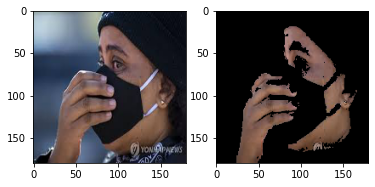

In [7]:
import cv2
img = cv2.imread('/home/lab/양창희/pytorch/pytorch_GCN/black1.jpg')
Visualize(img)